In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('BTCUSDT_2021_1_1_to_2024_6_1_with_1h.csv')
df = df[['real_time', 'open', 'high', 'low', 'close']]
df.columns = ("date","open","high","low","close")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,open,high,low,close
date,,,,
2021-01-01 00:00:00,28948.19,29055.00,28706.00,29015.00
2021-01-01 01:00:00,29015.00,29546.42,28975.46,29448.40
2021-01-01 02:00:00,29443.65,29500.00,29159.16,29237.06
2021-01-01 03:00:00,29236.58,29379.41,29174.95,29302.11
2021-01-01 04:00:00,29302.11,29422.32,29086.00,29237.07
...,...,...,...,...
2024-05-31 19:00:00,67456.20,68059.40,67388.20,67719.90
2024-05-31 20:00:00,67720.00,67834.40,67633.10,67755.00
2024-05-31 21:00:00,67755.00,67763.00,67557.70,67602.30


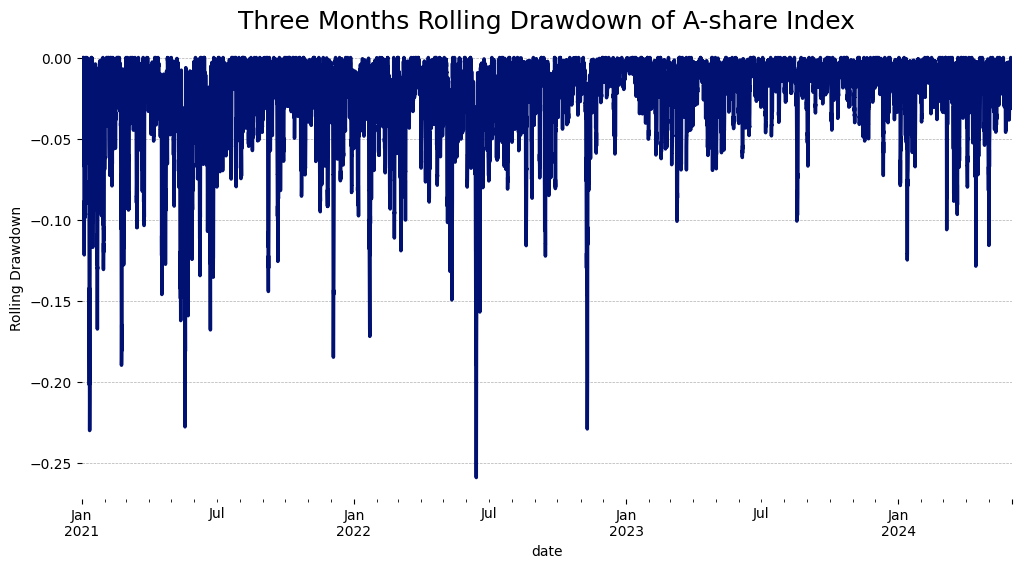

最大的三天滚动回撤: -25.89%


In [2]:
df['rolling_max'] = df['close'].rolling(window=36).max()

df['rolling_drawdown'] = (df['close'] - df['rolling_max']) / df['rolling_max']

df['three_days_rolling_drawdown'] = df['rolling_drawdown'].rolling(window=3).min()

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[(1/255, 17/255, 113/255)])  # RGB values scaled to [0,1]

plt.figure(figsize=(12, 6))
ax = df['three_days_rolling_drawdown'].plot(linewidth=2.5)
plt.title('Three Months Rolling Drawdown of A-share Index', fontsize=18)
plt.ylabel('Rolling Drawdown')
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

max_rolling_drawdown = df['three_days_rolling_drawdown'].min()
print("最大的三天滚动回撤: {:.2%}".format(max_rolling_drawdown))

d:\app\anaconda\envs\gputorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\app\anaconda\envs\gputorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\app\anaconda\envs\gputorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\app\anaconda\envs\gputorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

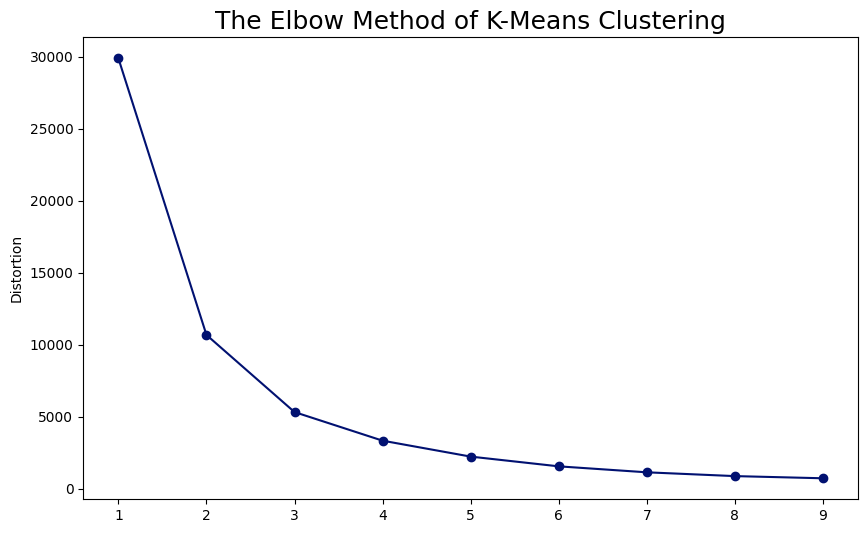

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = df[['three_days_rolling_drawdown']].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), sse, marker='o')
plt.title('The Elbow Method of K-Means Clustering', fontsize=18)
# plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
# plt.grid(True, which='major', axis='y', linewidth=0.5)
plt.show()


In [4]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
df['cluster'] = np.nan
df.loc[data.index, 'cluster'] = clusters
df

d:\app\anaconda\envs\gputorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,open,high,low,close,rolling_max,rolling_drawdown,three_days_rolling_drawdown,cluster
date,,,,,,,,
2021-01-01 00:00:00,28948.19,29055.00,28706.00,29015.00,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,29015.00,29546.42,28975.46,29448.40,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,29443.65,29500.00,29159.16,29237.06,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,29236.58,29379.41,29174.95,29302.11,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,29302.11,29422.32,29086.00,29237.07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,67456.20,68059.40,67388.20,67719.90,69418.8,-0.024473,-0.029359,0.0
2024-05-31 20:00:00,67720.00,67834.40,67633.10,67755.00,69418.8,-0.023968,-0.028273,1.0
2024-05-31 21:00:00,67755.00,67763.00,67557.70,67602.30,69418.8,-0.026167,-0.026167,1.0


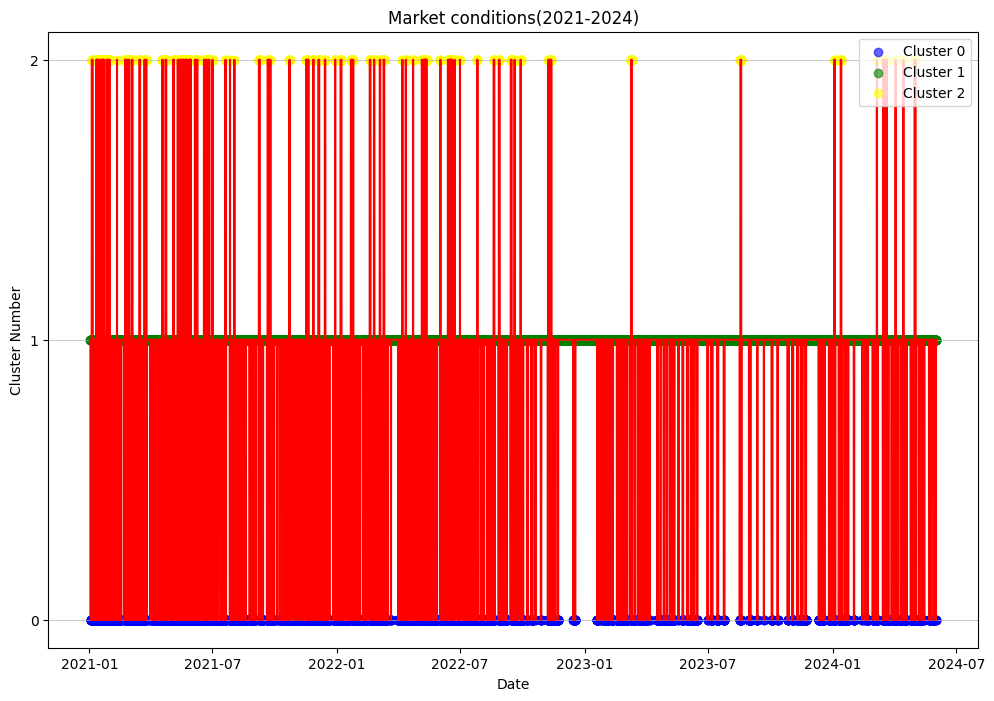

In [5]:
cluster_descriptions = [
    "Cluster 0",
    "Cluster 1",
    "Cluster 2"
]

plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'yellow']

for i, color in enumerate(colors):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['cluster'], color=color, label=cluster_descriptions[i], alpha=0.6)
plt.plot(df.index, df['cluster'], c='red', linestyle='-')
plt.title('Market conditions(2021-2024)')
plt.xlabel('Date')
plt.ylabel('Cluster Number')
plt.yticks([0, 1, 2])
plt.legend()
plt.grid(True, which='major', axis='y', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()
plt.show()

<Figure size 1200x600 with 0 Axes>

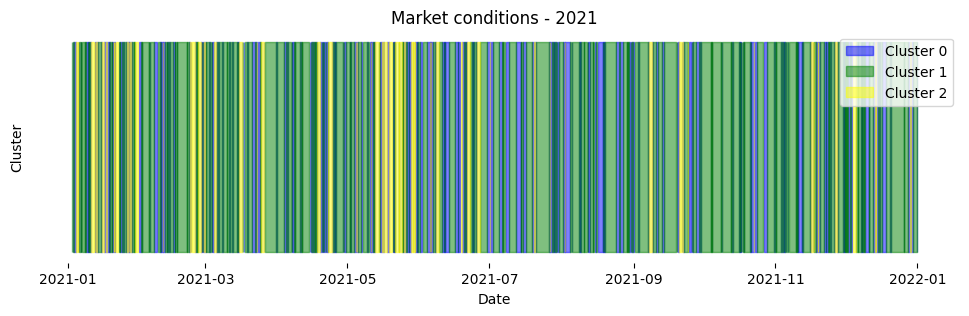

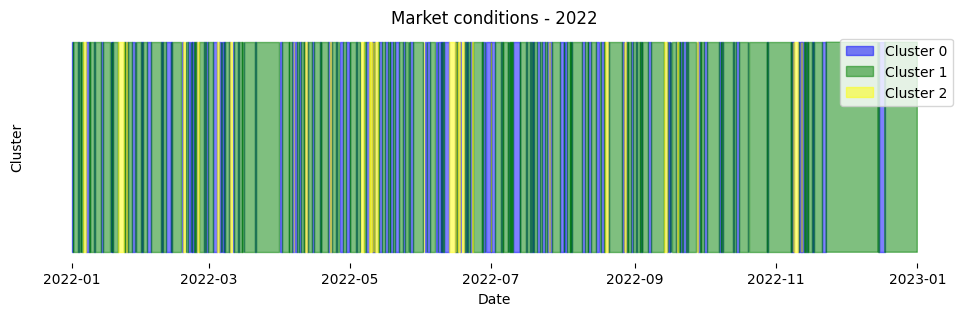

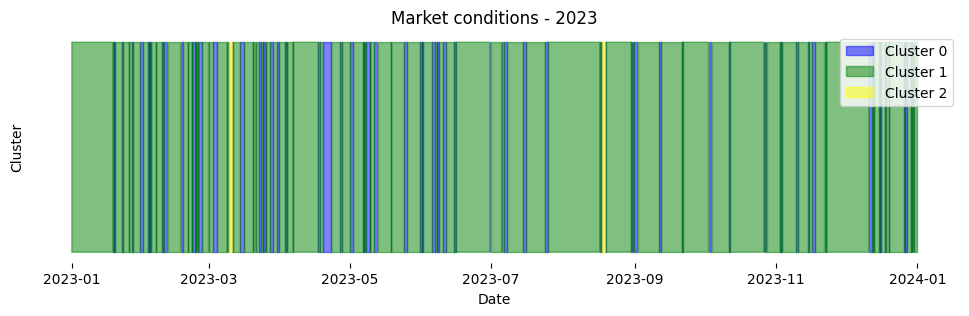

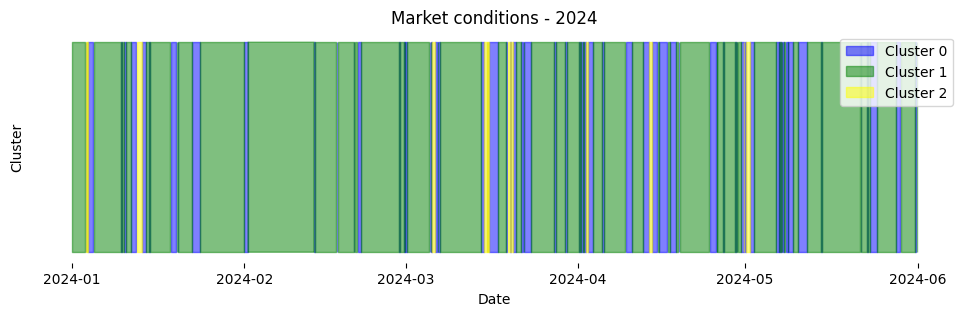

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df2 = df.copy()
df2 = df2.reset_index()


df2['date'] = pd.to_datetime(df2['date'])
df2['year'] = df2['date'].dt.year

plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'yellow']
cluster_descriptions = ['Cluster 0', 'Cluster 1', 'Cluster 2']
unique_years = df2['year'].unique()

for year in unique_years:
    plt.figure(figsize=(12, 3))
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    year_data = df2[df2['year'] == year]

    for j, color in enumerate(colors):
        mask = year_data['cluster'] == j
        plt.fill_between(year_data['date'], 0, 1, where=mask, color=color, alpha=0.5, label=cluster_descriptions[j], step='pre')

    plt.title(f'Market conditions - {year}')
    plt.xlabel('Date')
    plt.ylabel('Cluster')
    plt.yticks([])
    plt.legend()
    plt.show()

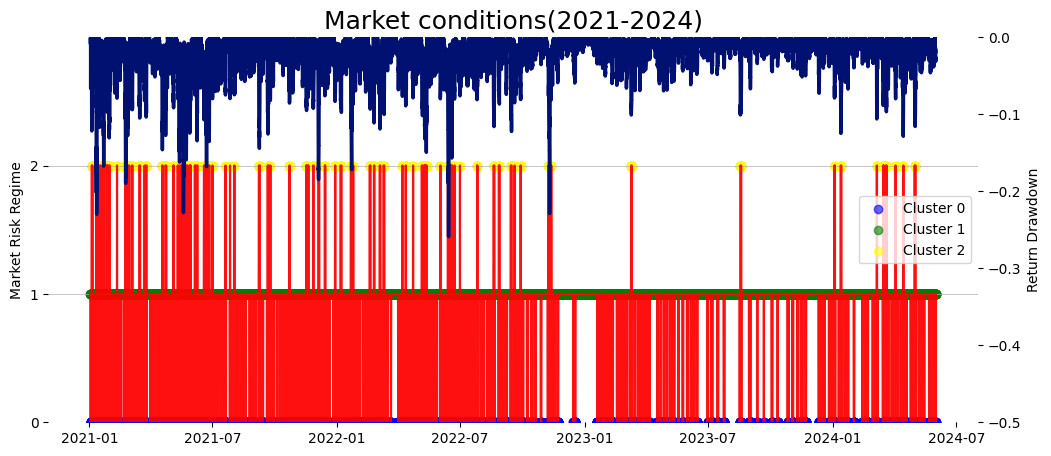

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
ax1 = plt.gca()
ax2 = ax1.twinx()


colors = ['blue', 'green', 'yellow']
for i, description in enumerate(cluster_descriptions):
    cluster_data = df[df['cluster'] == i]
    ax1.scatter(cluster_data.index, cluster_data['cluster'], color=colors[i], alpha=0.6, label=description)
    ax1.plot(df.index, df['cluster'], color='red', linestyle='-', alpha=0.6)
ax1.set_ylim(0, 3)
ax1.set_yticks([0, 1, 2])
ax1.set_ylabel('Market Risk Regime')
custom_blue = (1/255, 17/255, 113/255)
ax2.plot(df.index, df['three_days_rolling_drawdown'], color=custom_blue, linestyle='-', linewidth=2.5, label='Three Days Rolling Drawdown')
ax2.set_ylim(-0.5, 0)
ax2.set_ylabel('Return Drawdown')
ax1.set_title('Market conditions(2021-2024)', fontsize=18)
ax1.grid(True, which='major', axis='y', linewidth=0.5)

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_visible(False)

ax1.legend(loc='center right')
plt.show()